## Introduction

For this project, I worked with a really cool Spotify dataset that includes over 110,000 songs from tons of different genres. Each song comes with details like the artist name, track title, and genre, but also some deeper audio features like how danceable, energetic, or happy the song sounds.

The dataset covers 125 genres and gives a lot of insight into what makes music popular or how different styles compare in mood and sound. I thought it would be interesting to explore not just what makes a song popular, but how genres express emotion differently, or how energy levels shift across types of music.

The data comes from Kaggle: https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset?resource=download&select=dataset.csv

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('spotify.csv')

In [7]:
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


## Data Preprocessing

### Data Overview  

The data includes:
- Categorical features like artists, track_genre, and explicit
- Numerical features such as danceability, energy, valence, tempo, and popularity
- Boolean features like explicit
- ID and metadata fields such as track_id, album_name, and track_name

##### <div align="center">  Data Description </div>        

| **Column Name**       |     **Description**                             |  
|-----------------------|:-----------------------------------------------:|
| track_id              | Spotify ID for the track                        |
| artists               | Names of the artists performing the track       |
| album_name            | Album the track appears in                      |
| track_name            | Name of the track                               |
| popularity            | Popularity score (0–100)                        |
| duration_ms           | Length of the track in milliseconds             |
| explicit              | Explicit lyrics flag (True/False)               |
| danceability          | Danceability score (0.0–1.0)                    |
| energy                | Energy/intensity score (0.0–1.0)                |
| key                   | Musical key (0 = C, 1 = C#/Db, ..., 11 = B)     |
| loudness              | Loudness in decibels (dB)                       |
| mode                  | Modality (1 = major, 0 = minor)                 |
| speechiness           | Speech-like quality of audio (0.0–1.0)          |
| acousticness          | Confidence the track is acoustic (0.0–1.0)      |
| instrumentalness      | Likelihood track is instrumental (0.0–1.0)      |
| liveness              | Live performance probability (0.0–1.0)          |
| valence               | Positiveness or mood of track (0.0–1.0)         |
| tempo                 | Tempo in beats per minute (BPM)                 |
| time_signature        | Estimated beats per bar (usually 3–7)           |
| track_genre           | Genre assigned to the track                     |

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

I'll drop 'Unnamed: 0' column as it's just an index.

In [14]:
df = df.drop(columns=['Unnamed: 0'])

### Handling Missing Values and Duplicates  

According to the output of df.info(), I found that three columns have one missing entry each:
- artists
- album_name
- track_name

In [17]:
df_nas = pd.DataFrame(df.isna().sum(), columns=['Number of NAs'])
df_nas['Percentage of NAs'] = round(df_nas['Number of NAs'] / df.shape[0] * 100, 3)
df_nas

,Number of NAs,Percentage of NAs
track_id,0,0.000
artists,1,0.001
album_name,1,0.001
track_name,1,0.001
popularity,0,0.000
duration_ms,0,0.000
explicit,0,0.000
danceability,0,0.000
energy,0,0.000
key,0,0.000


In [18]:
df[df[['artists', 'album_name', 'track_name']].isnull().any(axis=1)]

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
65900,1kR4gIb7nGxHPI3D2ifs59,NaN,NaN,NaN,0,0,False,0.501,0.583,7,-9.46,0,0.0605,0.69,0.00396,0.0747,0.734,138.391,4,k-pop


We see that all missing values are in the same row. 

There was one row in the dataset that was missing all three main identifiers: the artist, album name, and track name. Even though the rest of the features (like genre and audio stuff) were filled in, those three fields are super important and can’t really be guessed or filled in based on the rest.

Since it was just one row out of the entire dataset, I decided to drop it.

In [21]:
df = df.drop(index=65900)

In [22]:
df.duplicated().sum()

450

In [23]:
df = df.drop_duplicates()

In [24]:
df.shape

(113549, 20)

These steps reduced the dataset from 114,000 rows to 113,549 clean and unique records.

### Data Type Conversion  

In [27]:
df.dtypes

track_id             object
artists              object
album_name           object
track_name           object
popularity            int64
duration_ms           int64
explicit               bool
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
track_genre          object
dtype: object

In [28]:
df['explicit'] = df['explicit'].map({False: 'Clean', True: 'Explicit'})
df['explicit'] = df['explicit'].astype('category')

In [29]:
df.track_genre.unique()

array(['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient',
       'anime', 'black-metal', 'bluegrass', 'blues', 'brazil',
       'breakbeat', 'british', 'cantopop', 'chicago-house', 'children',
       'chill', 'classical', 'club', 'comedy', 'country', 'dance',
       'dancehall', 'death-metal', 'deep-house', 'detroit-techno',
       'disco', 'disney', 'drum-and-bass', 'dub', 'dubstep', 'edm',
       'electro', 'electronic', 'emo', 'folk', 'forro', 'french', 'funk',
       'garage', 'german', 'gospel', 'goth', 'grindcore', 'groove',
       'grunge', 'guitar', 'happy', 'hard-rock', 'hardcore', 'hardstyle',
       'heavy-metal', 'hip-hop', 'honky-tonk', 'house', 'idm', 'indian',
       'indie-pop', 'indie', 'industrial', 'iranian', 'j-dance', 'j-idol',
       'j-pop', 'j-rock', 'jazz', 'k-pop', 'kids', 'latin', 'latino',
       'malay', 'mandopop', 'metal', 'metalcore', 'minimal-techno', 'mpb',
       'new-age', 'opera', 'pagode', 'party', 'piano', 'pop-film', 'pop',
       'pow

In [30]:
df.key.unique()

array([ 1,  0,  2,  6, 11,  8,  4,  7,  3, 10,  5,  9])

In [31]:
df['mode'].unique()

array([0, 1])

In [32]:
df.time_signature.unique()

array([4, 3, 1, 5, 0])

In [33]:
category_columns = ['track_genre', 'key', 'time_signature']
df[category_columns] = df[category_columns].astype('category')

In [34]:
df['mode'] = df['mode'].map({1: 'Major', 0: 'Minor'}).astype('category')

Some columns made more sense as categories, so I changed their types:

- **explicit**: Originally True/False. I turned it into 'Clean' or 'Explicit' so it’s easier to read in plots.
- **key**: Shows the musical key (like C, D, etc.). Since it’s not a continuous number, I made it a category.
- **mode**: Shows if the song is in a major (1) or minor (0) key. I labeled them and made it categorical for clarity.
- **time_signature**: This tells how many beats are in a bar (3 to 7). It's a small set of values, so it works better as a category.
- **track_genre**: Since this is the genre of each track, and used for grouping, I turned it into a category too.

I didn’t change things like popularity, duration, tempo, danceability, and energy, because they’re numeric and used for calculations. They work better as numbers.

Also, I left stuff like track_name, artists, and album_name as text (object) since they’re just descriptions and not used for analysis.

In [36]:
df.dtypes

track_id              object
artists               object
album_name            object
track_name            object
popularity             int64
duration_ms            int64
explicit            category
danceability         float64
energy               float64
key                 category
loudness             float64
mode                category
speechiness          float64
acousticness         float64
instrumentalness     float64
liveness             float64
valence              float64
tempo                float64
time_signature      category
track_genre         category
dtype: object

##### <div align="center">  Variable Type Summary </div>        

| **Type**         | **Columns**                                                                 |
|--------------------------|------------------------------------------------------------------------------|
| Identifiers (object)     | track_id, artists, album_name, track_name                                   |
| Categorical (category)   | explicit, key, mode, time_signature, track_genre                             |
| Numerical (int/float)    | popularity, duration_ms, danceability, energy, loudness, speechiness, acousticness, instrumentalness, liveness, valence, tempo |


In [38]:
df['explicit'].value_counts()

explicit
Clean       103831
Explicit      9718
Name: count, dtype: int64

In [39]:
df['track_genre'].value_counts().head(10)

track_genre
acoustic      1000
rock          1000
funk          1000
garage        1000
industrial    1000
j-rock        1000
mandopop      1000
metalcore     1000
mpb           1000
pagode        1000
Name: count, dtype: int64

In [40]:
df['mode'].value_counts()

mode
Major    72429
Minor    41120
Name: count, dtype: int64

In [41]:
df['key'].value_counts()

key
7     13199
0     13006
2     11594
9     11264
1     10740
5      9325
11     9251
4      8971
6      7891
10     7423
8      7337
3      3548
Name: count, dtype: int64

In [42]:
df['time_signature'].value_counts()

time_signature
4    101486
3      9128
5      1805
1       967
0       163
Name: count, dtype: int64

The original duration is in milliseconds, which isn’t very readable. So I made two new columns:

- duration_sec — track length in seconds  
- duration_min — track length in minutes

In [44]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
popularity,113549.0,33.324433,22.283855,0.000,17.0000,35.000000,50.0000,100.000
duration_ms,113549.0,228081.370844,106413.098525,8586.000,174184.0000,213000.000000,261588.0000,5237295.000
danceability,113549.0,0.567031,0.173409,0.000,0.4560,0.580000,0.6950,0.985
energy,113549.0,0.642091,0.251053,0.000,0.4730,0.685000,0.8540,1.000
loudness,113549.0,-8.243408,5.011422,-49.531,-9.9980,-6.997000,-5.0010,4.532
speechiness,113549.0,0.084674,0.105762,0.000,0.0359,0.048900,0.0845,0.965
acousticness,113549.0,0.314064,0.331906,0.000,0.0168,0.168000,0.5960,0.996
instrumentalness,113549.0,0.155703,0.309217,0.000,0.0000,0.000041,0.0487,1.000
liveness,113549.0,0.213613,0.190462,0.000,0.0980,0.132000,0.2730,1.000
valence,113549.0,0.474205,0.259204,0.000,0.2600,0.464000,0.6830,0.995


Before making visuals, I checked the summary stats to spot anything unusual.

- **Popularity**: Most songs aren't super popular, average is around 33, and only a few hit 100.
- **Duration**: Songs are about 3–4 minutes on average, but there's one that's 87 minutes, probably a podcast or background track.
- **Danceability & Energy**: Both are decent on average (around 0.57 and 0.64), so a lot of tracks are good for dancing or are upbeat.
- **Loudness**: Mostly around -8 dB which is fine, but I saw one track at -49 dB, could be an ambient or weird recording.
- **Speechiness**: Most are low (like music should be), but a few go close to 1, maybe rap or spoken word.
- **Valence**: Pretty balanced overall — average is around 0.47, so the dataset has happy and sad songs.
- **Tempo**: Around 122 BPM on average, which is normal, but there are some at 0 BPM, which doesn’t make sense. I’ll just watch out for those when using tempo in analysis.

While checking the summary statistics, I saw that a lot of numeric columns have 0 as the minimum value. For example:

- tempo has 0 BPM, which isn’t really valid for a song
- danceability, energy, speechiness, valence, and instrumentalness also have 0 as their lowest values

In some cases, 0 might actually make sense — like for instrumentalness or speechiness, since a song might not have vocals or spoken words. But for tempo, a value of 0 doesn’t work musically, so it’s probably just missing data.

Because of this, I didn’t want to just remove all rows with zeros. Instead, I’ll decide based on the situation. For example, I’ll only exclude tempo = 0 if I’m doing a visualization or analysis that directly uses tempo. Otherwise, I’ll keep those tracks since they might still be useful for other parts of the project.

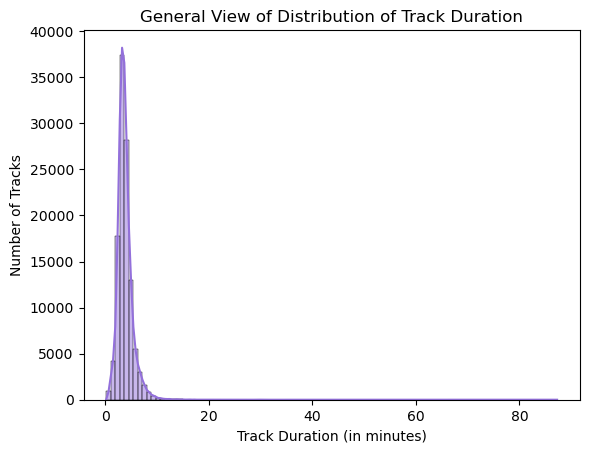

In [47]:
df['duration_min'] = df['duration_ms'] / 60000

sns.histplot(data=df, x='duration_min', bins=100, kde=True, color='mediumpurple')
plt.xlabel('Track Duration (in minutes)')
plt.ylabel('Number of Tracks')
plt.title('General View of Distribution of Track Duration')
plt.show()

This plot shows the complete range of track durations in the dataset, from very short to extremely long tracks - including those over 80 minutes in length.

We observe a long tail extending well beyond typical song length, which could represent:
- Live performances
- Classical pieces or ambient music
- Podcasts or incorrectly labeled audio

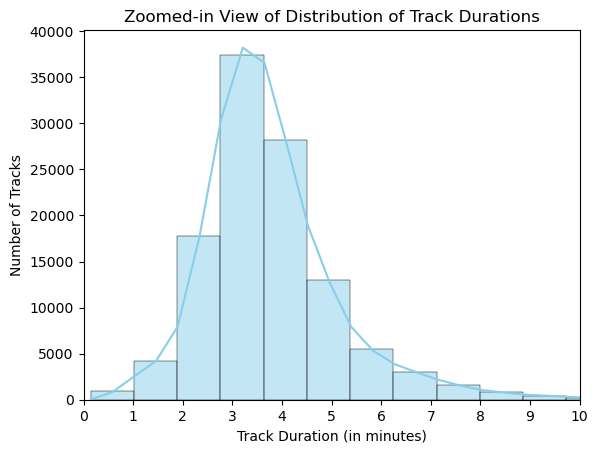

In [49]:
sns.histplot(data=df, x='duration_min', bins=100, kde=True, color='skyblue')

plt.xlim(0, 10)
plt.xlabel('Track Duration (in minutes)')
plt.ylabel('Number of Tracks')
plt.xticks(range(0, 11))
plt.title('Zoomed-in View of Distribution of Track Durations')

plt.show()

This zoomed-in histogram focuses on songs between 0 and 10 minutes in length. It shows that the majority of tracks fall between 2 and 5 minutes, typical of standard releases.

### Outlier Removal  

In [52]:
def remove_iqr_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

for col in ['duration_min', 'tempo', 'loudness', 'speechiness']:
    df = remove_iqr_outliers(df, col)

To make the analysis more accurate and realistic, I decided to remove some outliers using the IQR (Interquartile Range) method. Basically, this helps catch any values that are way too high or low compared to most other data points in a column.

I used this method on a few important numeric features:

- duration_min: Some tracks were over 80 minutes long — probably podcasts, live shows, or just data issues. I removed these since I wanted to focus on regular-length songs.
- tempo: There were songs with 0 BPM or super low tempo values, which doesn’t really make sense musically. These got filtered out to keep rhythm-based plots more meaningful.
- loudness: A few tracks had extremely low loudness (like under -40 dB), which is way outside normal audio levels. I took those out so they wouldn’t mess up analyses that relate to energy or volume.
- speechiness: Some values were extremely high or very low, likely due to spoken-word tracks or errors. I trimmed the extremes to keep it balanced while still reflecting genres like rap or audiobooks.

I didn’t remove outliers from other numeric columns because most of them are already on a 0–1 scale (like energy or valence), or their extreme values actually reflect meaningful musical diversity, like very acoustic or very instrumental songs. I kept those to keep the dataset rich and realistic.

## Hypotheses and Visualizations

1. Shorter songs are more popular than longer ones.
2. Explicit songs have higher average energy and loudness.
3. Popular songs have higher danceability, energy, and valence than less popular songs.
4. Tracks with higher energy also tend to have higher valence (happier songs are more energetic)

### 1. Shorter songs are more popular than longer ones.

To explore this, I first converted duration_ms into minutes for easier interpretation.  
Then, I did feature engineering by creating a new categorical column called track_length_group, which groups tracks into:

- Short (0-5 minutes)  
- Medium (5–10 minutes)  
- Long (10+ minutes)

I'll compare the popularity scores across these groups using a boxplot and mean comparison.

In [58]:
df['duration_min'] = df['duration_ms'] / 60000

In [59]:
df['track_length_group'] = pd.cut(
    df['duration_min'],
    bins=[0, 5, 10, np.inf],
    labels=['Short', 'Medium', 'Long'],
    include_lowest=True
)

/var/folders/0l/7b8_ztcx19d3zxdnsypbsg1r0000gn/T/ipykernel_89780/2386024911.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


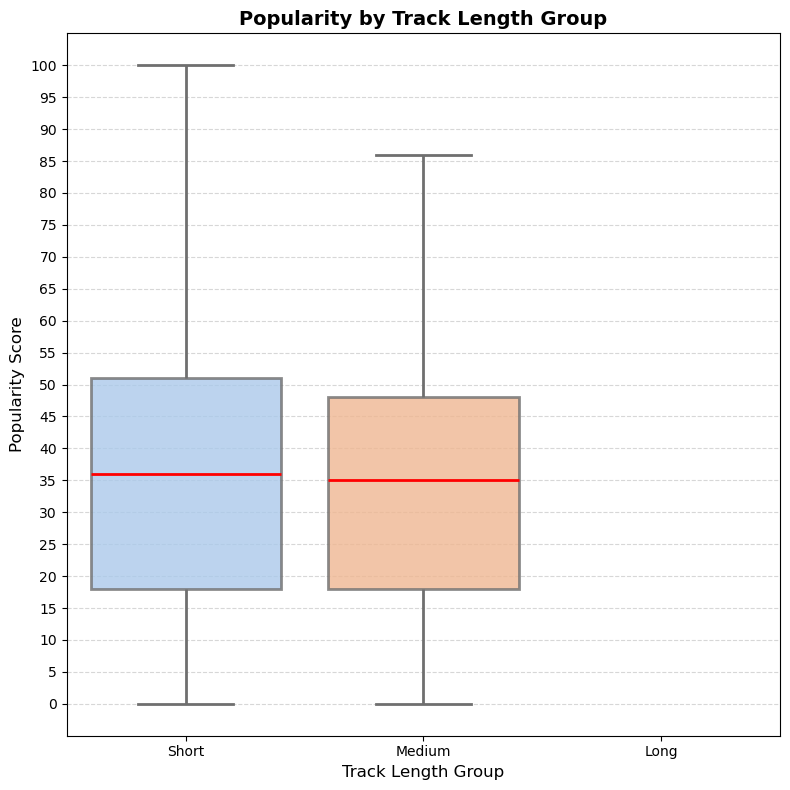

In [60]:
plt.figure(figsize=(8, 8))

sns.boxplot(
    x='track_length_group',
    y='popularity',
    data=df,
    palette='pastel',
    linewidth=2,
    fliersize=2,
    boxprops=dict(alpha=0.8),
    medianprops=dict(color='red', linewidth=2)
)

plt.title('Popularity by Track Length Group', fontsize=14, weight='bold')
plt.xlabel('Track Length Group', fontsize=12)
plt.ylabel('Popularity Score', fontsize=12)

plt.yticks(range(0, 101, 5))
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

- Short tracks (0–5 min) have the highest median popularity and include most of the top-performing songs (up to 100).
- Medium tracks (5–10 min) are slightly behind, with a similar spread.
- Long tracks (10+ min) have the lowest median and a more compressed range, meaning they’re generally less popular.

This confirms the hypothesis that shorter tracks tend to be more popular, especially when aiming for mainstream or viral success.

### 2. Valence (mood) varies a lot by genre - pop is happier, classical is neutral, metal is lower.

In this part, I wanted to explore how valence (which represents the musical mood or emotional positivity of a track) differs by track genre.

To do this, I calculated the average valence score for each genre.  
Since the dataset includes over 100 genres, I focused on the top 30 genres by frequency to make the visualization readable.

I then used a barplot to compare the average mood across those genres and see if some genres are generally happier or more emotionally positive than others.


or example:
- **Pop** should have higher valence (more upbeat)
- **Classical** might be more neutral or balanced
- **Ambient or metal** might lean toward lower valence

In [64]:
top_genres = df['track_genre'].value_counts().nlargest(30).index
genre_subset = df[df['track_genre'].isin(top_genres)].copy()

genre_subset['track_genre'] = pd.Categorical(
    genre_subset['track_genre'],
    categories=top_genres,
    ordered=True
)

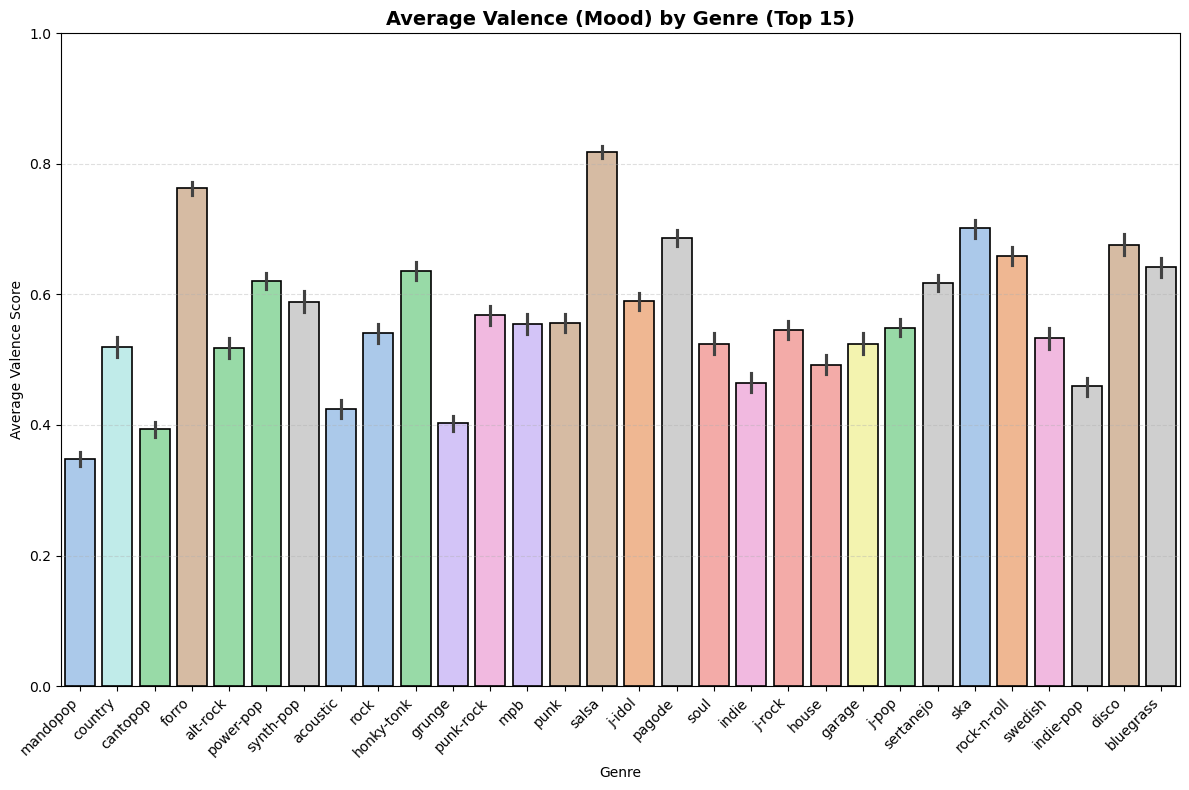

In [65]:
plt.figure(figsize=(12, 8))

sns.barplot(
    data=genre_subset,
    x='track_genre',
    y='valence',
    hue='track_genre',
    order=top_genres,
    palette='pastel',
    estimator='mean',
    edgecolor='black',
    linewidth=1.2,
    dodge=False
)

plt.title('Average Valence (Mood) by Genre (Top 15)', fontsize=14, weight='bold')
plt.xlabel('Genre')
plt.ylabel('Average Valence Score')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

This chart shows how the valence (mood or positiveness) of songs changes across the 30 most common genres in the dataset.

Some genres clearly stand out with higher mood scores — like forró, salsa, ska, and rock-n-roll, which are generally more upbeat and happy. In contrast, genres like mandopop, acoustic, and indie have lower mood values, which probably reflects a more mellow or emotional tone.

We can also spot genres that are somewhere in the middle, like alt-rock, power-pop, and grunge, which mix both happy and sad elements.

Looking at this bigger set of genres gives us a better understanding of how different types of music express mood differently, and it really supports the idea that some genres are more cheerful than others.

### 3. Popular songs have higher danceability, energy, and valence than less popular songs.

To explore it, I created a new feature called popularity_group.

This feature splits tracks into three categories based on their popularity score:
- Low (0–30)
- Medium (30–60)
- High (60–100)

Then, I calculated the average danceability, energy, and valence within each group and visualized the results using a lineplot.  
This helps identify if there's a clear trend between popularity and these key musical features.

In [69]:
pop_bins = [0, 33, 66, 100]
pop_labels = ['Low', 'Medium', 'High']

df['popularity_group'] = pd.cut(df['popularity'], bins=pop_bins, labels=pop_labels, include_lowest=True)

In [70]:
features = ['danceability', 'energy', 'valence']

grouped = df.groupby('popularity_group', observed=True)[features].mean().reset_index()
melted = pd.melt(grouped, id_vars='popularity_group', var_name='Feature', value_name='Average')

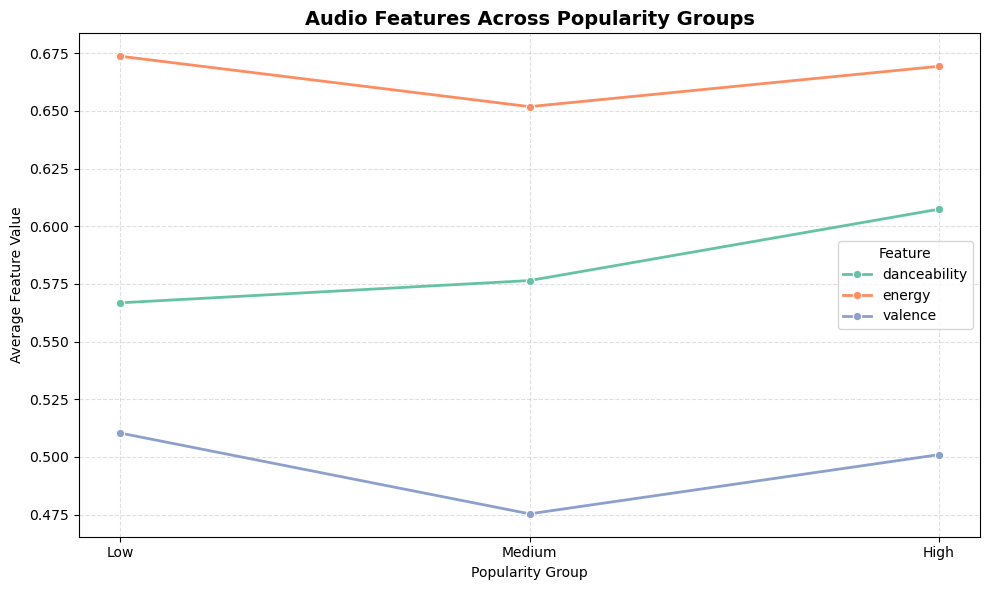

In [71]:
plt.figure(figsize=(10, 6))

sns.lineplot(
    data=melted,
    x='popularity_group',
    y='Average',
    hue='Feature',
    marker='o',
    linewidth=2,
    palette='Set2'
)

plt.title('Audio Features Across Popularity Groups', fontsize=14, weight='bold')
plt.xlabel('Popularity Group')
plt.ylabel('Average Feature Value')
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

This line plot compares average danceability, energy, and valence across three popularity groups.

- **Danceability increases clearly** with popularity — tracks that are easier to dance to are more likely to be popular.
- **Energy also increases** from medium to high popularity, though the difference is more subtle.
- **Valence** (musical mood) is slightly higher for popular songs, but less consistent across groups.

Overall, this supports the hypothesis that popular songs tend to have more danceable and energetic qualities, making them more engaging for listeners.

### 4. Tracks with higher energy also tend to have higher valence (happier songs are more energetic)

To analyze this, I grouped tracks by valence into five mood categories:
- Very Low
- Low
- Medium
- High
- Very High

Then, I calculated the average energy level for each group and used a lineplot to visualize the trend.  
This helps reveal whether emotional positivity is associated with higher musical intensity.

In [75]:
valence_bins = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
valence_labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']

df['valence_group'] = pd.cut(df['valence'], bins=valence_bins, labels=valence_labels, include_lowest=True)

In [76]:
valence_grouped = df.groupby('valence_group', observed=True)[['energy', 'danceability']].mean().reset_index()
melted_valence = pd.melt(valence_grouped, id_vars='valence_group', var_name='Feature', value_name='Average')

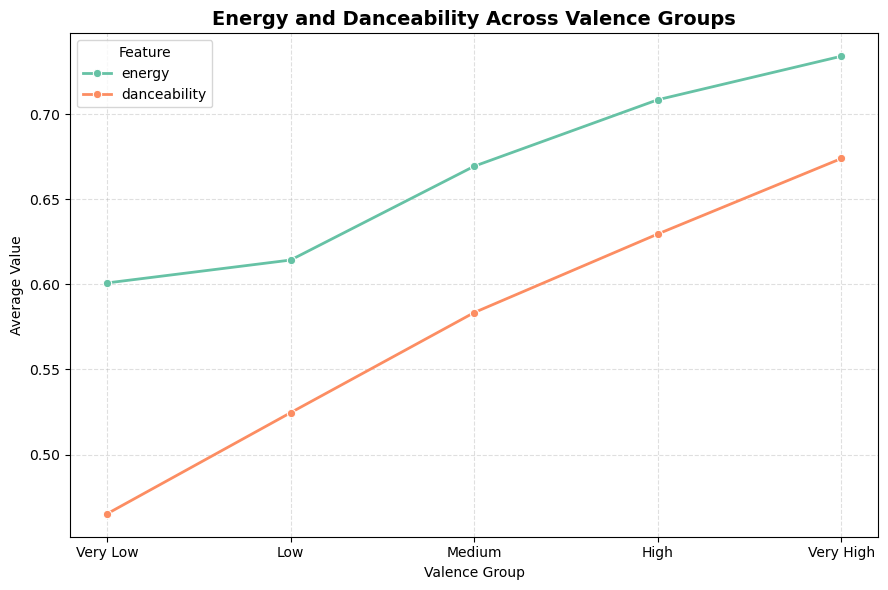

In [77]:
plt.figure(figsize=(9, 6))
sns.lineplot(
    data=melted_valence,
    x='valence_group',
    y='Average',
    hue='Feature',
    marker='o',
    linewidth=2,
    palette='Set2'
)

plt.title('Energy and Danceability Across Valence Groups', fontsize=14, weight='bold')
plt.xlabel('Valence Group')
plt.ylabel('Average Value')
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

This lineplot shows that as valence increases, so does energy and danceability. The trend is consistent across all groups, confirming that happier songs tend to be more energetic and rhythmically suitable for dancing.

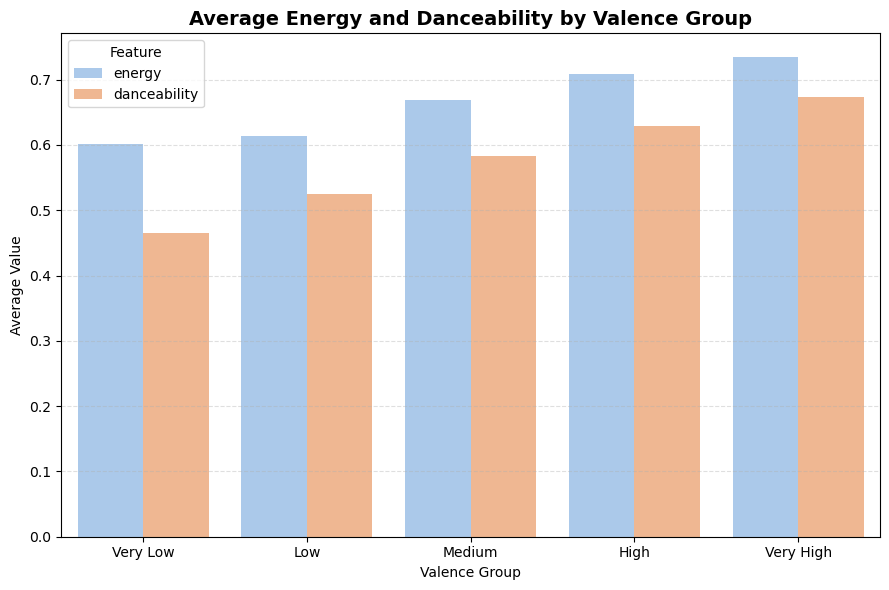

In [79]:
plt.figure(figsize=(9, 6))
sns.barplot(
    data=melted_valence,
    x='valence_group',
    y='Average',
    hue='Feature',
    palette='pastel'
)

plt.title('Average Energy and Danceability by Valence Group', fontsize=14, weight='bold')
plt.xlabel('Valence Group')
plt.ylabel('Average Value')
plt.grid(True, axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

This grouped barplot confirms the upward trend seen in the lineplot. Both energy and danceability increase across mood levels. "Very High" valence songs are clearly the most energetic and danceable.

### 5. Explicit tracks tend to be more energetic and less acoustic

This hypothesis explores whether explicit songs differ musically from clean ones in terms of energy and acousticness.

The assumption is that explicit tracks often belong to genres like hip-hop or electronic music, which are typically more energetic and produced with digital instruments rather than acoustic ones.

To test this, I grouped the data by explicit content (Explicit vs Clean), calculated the average energy and acousticness for each group, and visualized the comparison using a grouped barplot.

In [83]:
explicit_grouped = df.groupby('explicit', observed=True)[['energy', 'acousticness']].mean().reset_index()
explicit_melted = pd.melt(explicit_grouped, id_vars='explicit', var_name='Feature', value_name='Average')

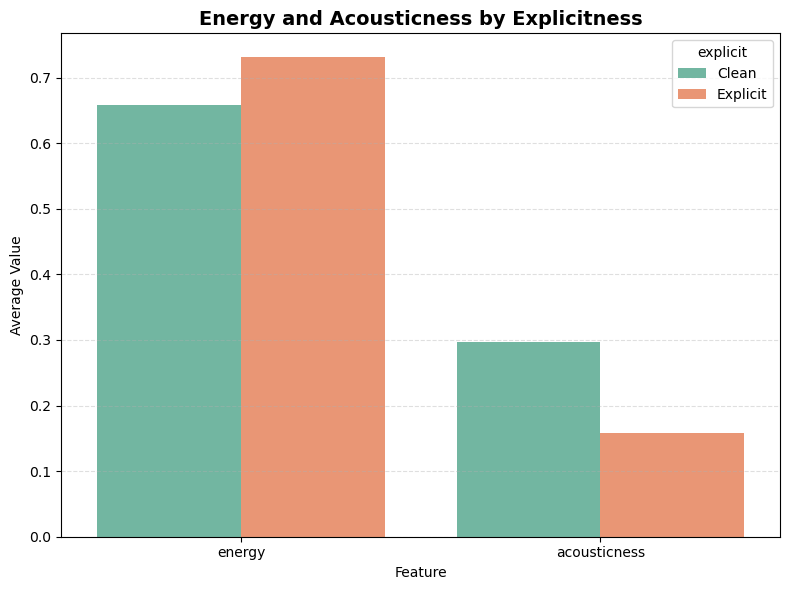

In [84]:
plt.figure(figsize=(8, 6))

sns.barplot(
    data=explicit_melted,
    x='Feature',
    y='Average',
    hue='explicit',
    palette='Set2'
)

plt.title('Energy and Acousticness by Explicitness', fontsize=14, weight='bold')
plt.ylabel('Average Value')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

This plot confirms that explicit songs are more energetic and less acoustic than clean tracks. It reflects genre trends: explicit music often comes from louder, more intense styles, while clean tracks are more frequently acoustic or mellow in nature.

## Conclusion

This project gave me a chance to dive into a large and diverse Spotify dataset and explore how different musical features relate to things like popularity, mood and genre.

Through the hypotheses and visualizations, I found that:
- Shorter songs are generally more popular than longer ones
- Genres like pop and salsa tend to have higher mood (valence), while classical or acoustic genres are more neutral or low in mood
- Popular songs often have higher danceability, energy, and valence
- Happier songs are also more energetic and easier to dance to
- Explicit songs are louder and less acoustic, which fits genre patterns like hip-hop or trap

Cleaning the data and creating new features (like grouping durations or moods) really helped highlight these patterns in a way that was clear and visual. Overall, it was interesting to see how audio features reflect different styles of music — and how they actually line up with what we feel when we listen.

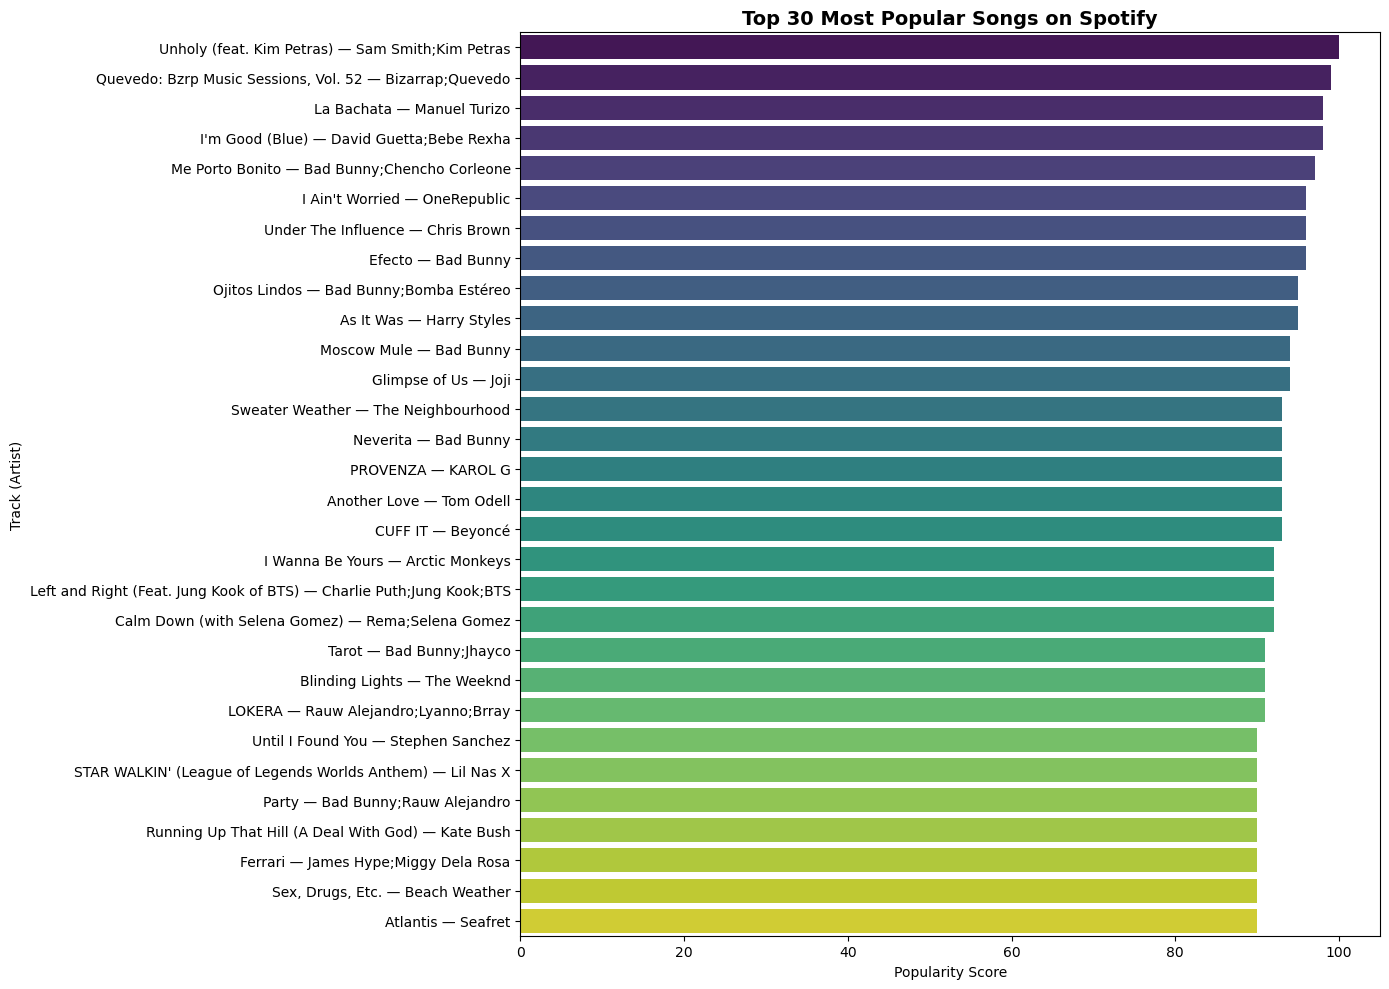

In [88]:
df_sorted = df.sort_values(by='popularity', ascending=False)
top_unique = df_sorted.drop_duplicates(subset=['track_name', 'artists'])
top_30_unique = top_unique.head(30).copy()
top_30_unique['label'] = top_30_unique['track_name'] + ' — ' + top_30_unique['artists']

plt.figure(figsize=(14, 10))
sns.barplot(
    data=top_30_unique,
    x='popularity',
    y='label',
    hue='label',
    palette='viridis',
    legend=False
)

plt.title('Top 30 Most Popular Songs on Spotify', fontsize=14, weight='bold')
plt.xlabel('Popularity Score')
plt.ylabel('Track (Artist)')
plt.tight_layout()
plt.show()